In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import color, io, feature, exposure
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
dataset_path = 'fruits'

# List all subdirectories (assuming each subdirectory corresponds to a class)
class_folders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]
images=[]
img_name =[]
# labels_list=[]


# Loop through each class folder
for class_folder in class_folders:
    class_name = os.path.basename(class_folder)

    # Loop through each image in the class folder
    for inx,image_filename in enumerate(os.listdir(class_folder)):
        
        
        image_path = os.path.join(class_folder, image_filename)

        # Load the image
        image = io.imread(image_path)

        images.append(image)
        img_name.append(image_path)

In [3]:
# Convert the list of images to a 2D array (assuming images have the same size)
image_data = np.array(images).reshape(len(images), -1)
#image_data is (number_of_images, total_pixels_in_each_image)

# Standardize the image data
scaler = StandardScaler()
image_data_standardized = scaler.fit_transform(image_data)

In [4]:
# Apply PCA
num_components = 30  # Adjust the number of components based on your requirements
pca = PCA(n_components=num_components)
image_data_pca = pca.fit_transform(image_data_standardized)

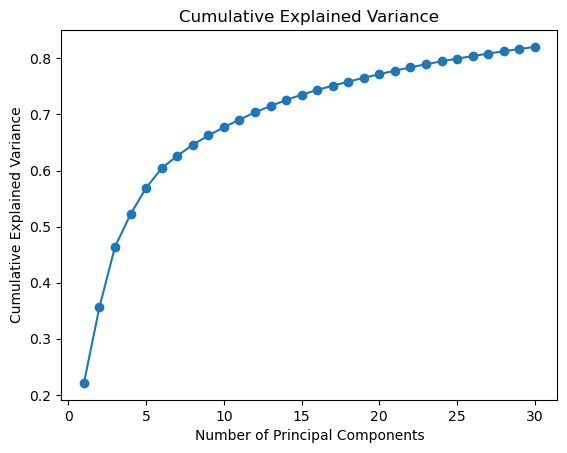

In [5]:
# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, num_components + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [6]:
features_data = image_data_pca

In [7]:
# Specify the number of clusters (adjust this based on your analysis)
num_clusters = 5

In [8]:
# Initialize the KMeans model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your feature data
kmeans_model.fit(features_data)

image_cluster = pd.DataFrame(img_name,columns=['image'])
image_cluster["clusterid"] = kmeans_model.labels_

print(image_cluster.head(100))

                                image  clusterid
0     fruits\Apple Golden 1\0_100.jpg          2
1    fruits\Apple Golden 1\10_100.jpg          2
2    fruits\Apple Golden 1\13_100.jpg          2
3   fruits\Apple Golden 1\147_100.jpg          2
4    fruits\Apple Golden 1\14_100.jpg          2
..                                ...        ...
95   fruits\Apple Golden 1\65_100.jpg          2
96   fruits\Apple Golden 1\69_100.jpg          2
97    fruits\Apple Golden 1\6_100.jpg          2
98    fruits\Apple Golden 1\7_100.jpg          2
99    fruits\Apple Golden 1\8_100.jpg          2

[100 rows x 2 columns]


In [9]:
# Images will be seperated according to cluster they belong

for i in range(num_clusters): 
    os.mkdir(str(i))


for i in range(len(image_cluster)):
    if image_cluster['clusterid'][i]==0:
        shutil.copy(image_cluster['image'][i], '0')
    elif image_cluster['clusterid'][i]==1:
        shutil.copy(image_cluster['image'][i], '1')
    elif image_cluster['clusterid'][i]==2:
        shutil.copy(image_cluster['image'][i], '2')
    elif image_cluster['clusterid'][i]==3:
        shutil.copy(image_cluster['image'][i], '3')
    elif image_cluster['clusterid'][i]==4:
        shutil.copy(image_cluster['image'][i], '4')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: '0'